In [11]:
import pandas as pd

In [12]:
import joblib

df = joblib.load('../all_predictions.pkl')

In [13]:
def fetch_geometry(inset_dist, l, sub_thick, w, w0, y0, geometry_name):
    geo_df = df[(df['inset_dist [mm]'] == inset_dist) & (df['L [mm]'] == l) & (df['sub_thick [mm]'] == sub_thick) & (df['W [mm]'] == w) & (df['W0 [mm]'] == w0) & (df['y0 [mm]'] == y0)].copy()
    geo_df['Geometry Name'] = geometry_name
    return geo_df

In [14]:
geometries = [
    fetch_geometry(0.6, 11.5, 2.0, 14.8, 2.5, 4.25, 1),
    fetch_geometry(0.6, 12.0, 2.0, 14.8, 2.75, 4.5, 2),
    fetch_geometry(1.0, 12.0, 2.0, 15.6, 3.5, 4.25, 3),
    fetch_geometry(1.4, 11.5, 2.0, 15.6, 3.5, 4.25, 4),
    fetch_geometry(1.4, 11.5, 2.0, 15.4, 3.5, 4.5, 5),
    fetch_geometry(1.4, 11.75, 2.0, 15.4, 3.5, 4.75, 6)
]

geometries_df = pd.concat(geometries)

In [15]:
geometries_df

,inset_dist [mm],L [mm],sub_thick [mm],W [mm],W0 [mm],y0 [mm],Freq [GHz],prediction,Geometry Name
5252,0.6,11.50,2,14.8,2.5,4.25,4.00,-0.173352,1
5253,0.6,11.50,2,14.8,2.5,4.25,4.08,-0.179909,1
5254,0.6,11.50,2,14.8,2.5,4.25,4.16,-0.189604,1
5255,0.6,11.50,2,14.8,2.5,4.25,4.24,-0.198633,1
5256,0.6,11.50,2,14.8,2.5,4.25,4.32,-0.206935,1
...,...,...,...,...,...,...,...,...,...
570847,1.4,11.75,2,15.4,3.5,4.75,11.68,-23.979636,6
570848,1.4,11.75,2,15.4,3.5,4.75,11.76,-21.671813,6
570849,1.4,11.75,2,15.4,3.5,4.75,11.84,-19.925751,6
570850,1.4,11.75,2,15.4,3.5,4.75,11.92,-19.591367,6


In [19]:
geometries[0]

,inset_dist [mm],L [mm],sub_thick [mm],W [mm],W0 [mm],y0 [mm],Freq [GHz],prediction,Geometry Name
5252,0.6,11.5,2,14.8,2.5,4.25,4.00,-0.173352,1
5253,0.6,11.5,2,14.8,2.5,4.25,4.08,-0.179909,1
5254,0.6,11.5,2,14.8,2.5,4.25,4.16,-0.189604,1
5255,0.6,11.5,2,14.8,2.5,4.25,4.24,-0.198633,1
5256,0.6,11.5,2,14.8,2.5,4.25,4.32,-0.206935,1
...,...,...,...,...,...,...,...,...,...
5348,0.6,11.5,2,14.8,2.5,4.25,11.68,-12.245166,1
5349,0.6,11.5,2,14.8,2.5,4.25,11.76,-13.603761,1
5350,0.6,11.5,2,14.8,2.5,4.25,11.84,-14.576105,1
5351,0.6,11.5,2,14.8,2.5,4.25,11.92,-15.245051,1


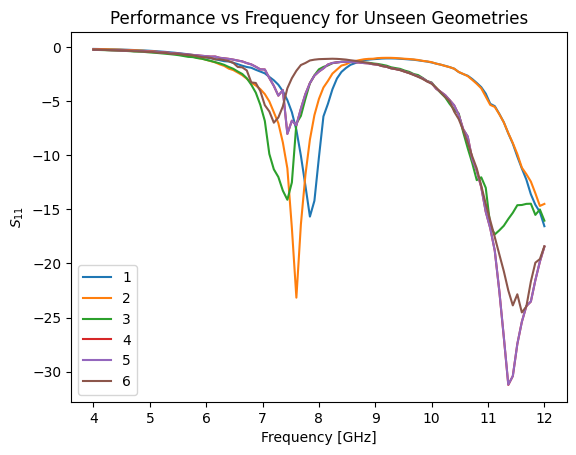

In [22]:
import matplotlib.pyplot as plt

for geo in geometries:
    plt.plot(geo['Freq [GHz]'], geo['prediction'])
plt.legend(geometries_df['Geometry Name'].unique())
plt.title('Performance vs Frequency for Unseen Geometries')
plt.ylabel('$S_{11}$')
plt.xlabel('Frequency [GHz]')
plt.show()

In [21]:
import plotly.express as px
fig = px.line(geometries_df, x="Freq [GHz]", y="prediction", title='Performance vs Frequency for Unseen Geometries', color="Geometry Name", width=1000, height=750)
# fig.update_layout()
display(fig)

/opt/miniconda3/envs/tylers_env_do_not_touch/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

